#Support Vector Machine
For Data Mining lecture 

Soegijapranata Catholic University

By: Yonathan Santosa yonathansantosa@unika.ac.id

##Importing library
First let's import required library

*   Numpy : for array, vector, matrix manipulation
*   pytorch : for implementing SVM
*   SVC : for implementing SVM


In [ ]:
import numpy as np
import torch
from sklearn.svm import SVC

###Function for plotting

In [ ]:
__all__ = ['get_line', 'plot']

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

def get_line(W, b, x):
    return (-W[0]*x+b)/W[1]

def plot(X, Y, W=None, b=None):
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x1 = np.arange(x1_min, x1_max, .02)
    xx1, xx2 = np.meshgrid(x1, np.arange(x2_min, x2_max, .02))
    if W is not None and b is not None:
        decision = np.c_[xx1.ravel(), xx2.ravel()] @ W + b
        plt.contourf(xx1, xx2, decision.reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)
        plt.colorbar()
        for intercept in [-1,0,1]:
            plt.plot(x1, get_line(W, b + intercept, x1), c='black')
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:,0],X[:,1], c=Y.ravel(), cmap=cm_bright)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

def plotK(X, Y, clf):
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    x1 = np.arange(x1_min, x1_max, .02)
    
    xx1, xx2 = np.meshgrid(x1, np.arange(x2_min, x2_max, .02))
    decision = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    plt.contourf(xx1, xx2, decision.reshape(xx1.shape), cmap=plt.cm.RdBu, alpha=.8)
    plt.colorbar()
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.scatter(X[:,0],X[:,1], c=Y.ravel(), cmap=cm_bright)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.show()

##Let's create the dataset

In [ ]:
np.random.seed(20)
torch.random.manual_seed(20)

Let's randomly create dataset using two centers with $\sigma=0.5$

In [ ]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=200, centers=[(-1, -1), (1, 1)], cluster_std=0.7)
Y[Y == 0] = -1 # to have +/- 1 labels

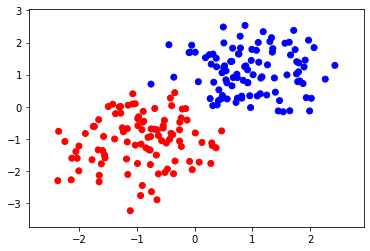

In [ ]:
plot(X, Y)

##Classification
Let's implement SVM

In [ ]:
X_tensor = torch.tensor(X, dtype=torch.float) 
Y_tensor = torch.tensor(Y, dtype=torch.float) # reshaping Y into 2D and converting it into float

In [ ]:
W = torch.randn(2,1 ,requires_grad=True)
b = torch.randn(1,1 ,requires_grad=True)

In [ ]:
def hinge_loss(loss):
    return loss

In [ ]:
C = 10
lamb = 0.0001

In [ ]:
steps = 500
eta = 0.1

for i in range(steps):
    loss = 0.
    if not i%100:
        print(f'Step: {i:03d}, Loss: {loss:.05f}')

Step: 000, Loss: 0.00000
Step: 100, Loss: 0.00000
Step: 200, Loss: 0.00000
Step: 300, Loss: 0.00000
Step: 400, Loss: 0.00000


In [ ]:
W_final = W.detach().numpy() # detach it from the computational graph
b_final = b.detach().numpy()

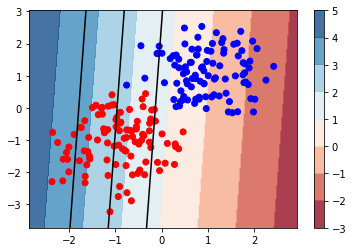

In [ ]:
plot(X, Y, W=W_final, b=b_final.ravel())

##Kernel Method
Let's try some kernels

###Gaussian Kernel
$K(x_i, x_j) = exp\left(-\frac{\Vert x_i-x_j \Vert^2}{\sigma}\right)$

###Radial Basis Function
$K(x_i, x_j) = exp(-\gamma\Vert x_i-x_j \Vert^2)$, for $\gamma > 0$

###Polynomial Kernel
$K(x_i, x_j) = (x_i\cdot x_j+1)^d$

###For the second experiment let's use Scikit-learn library

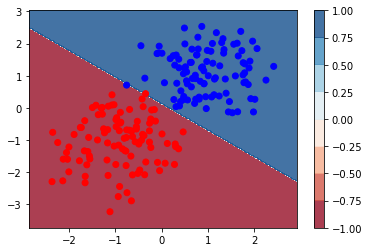

In [ ]:
clf = SVC(C=1, tol=0.01, kernel="linear")
clf.fit(X, Y)

plotK(X, Y, clf)

##**Assignment**
###Task 1. 
Try different C values, 
$C = [0.1, 1, 10, 100]$ 
and write the comparisson

###Task 2. 
With C = 0.5, try different $\lambda$ values,
$\lambda = [0.001, 0.01, 0.1]$
and write the comparisson

###Task 3. 
With C = 1 and $\lambda = 0.01$, try different kernel function
and write the comparisson



1.   Poly, degree = [1,2,3]
2.   rbf, gamma = [0.1,1,2]
3.   linear



NATHANAEL KARUNIA (18.K1.0027)

Task 1

Perbedaan saat saya merubah nilai C terletak saat saya set 0.1 titik warna biru menembus garis tengah, tetapi saat saya set di 100 titik biru tidak menembus.

Task 2

Saat saya membuat nilai C = 0.5 dan lambda saya rubah2 menurut saya yang terlihat perbedaannya ada pada hampir sama dengan task 1 yaitu pada titik birunya.

Task 3 

Dengan C = 1 dan lambda = 0.01 dan merubah rubah function perbedaan nya :

1. Poly  dan degree [1,2,3]
  Saat degree 1 keadaan masih sama dengan keadaan yang di task 2 yaitu ada garis tengah dan titik biru dan merah di kanan dan kiri. Saat dirubah ke degree 2, area biru ada 2 berada di atas kanan dan bawah kiri dan berbentuk setengah lingkaran. Saat dirubah ke degree 3, area merah dan biru sama seperti task 1 dan 2 hanya saja ada sedikit lengkungan pada garis tengahnya.

2. rbf dan gamma [0.1,1,2]
  Saat gamma saya jadikan 0.1 area warna merah lebih besar dari pada area warna biru dan garis tengah nya sedikit melengkung. Saat gamma saya jadikan 1 area warna biru semakin kecil, dengan garis nya yang tidak beraturan. Saat gamma saya jadikan 2, area warna biru semakin kecil lagi dan garis nya tidak beraturan.

3. Garis tengahnya menjadi lurus dengan sedikit titik merah dan biru yang melewati garis tengahnya tersebut / hampir sama dengan task 1 atau 2.